<a href="https://colab.research.google.com/github/AmDeep/AI_LaunchLab_Team3/blob/main/Load_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import torch
from matplotlib import pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
DATA_DIR = 'drive/MyDrive/Data/Climate/SR'

In [5]:
 cropped_x = torch.load('{}/{}'.format(DATA_DIR,'cropped_x.pt')) 

In [6]:
 cropped_y = torch.load('{}/{}'.format(DATA_DIR,'cropped_y.pt')) 

In [7]:
from torch.utils.data import DataLoader, TensorDataset, Dataset

In [9]:
def display_images(x, x_hat, num_im=1, label=None):
    x= x.permute(1,0,2,3)
    x=x[0][:]
    for N in range(num_im):
        if x is not None:
            x_im = x.data.cpu().view(-1, 64, 64)
            fig = plt.figure(figsize=(18, 4))
            fig.suptitle(' Value of the first layer in the second dimension (tt) - input image', fontsize=12)
    #        plt.subtitle(label + ' – initial image / reconstructed image', color='black', fontsize=12)
            for i in range(4):
                plt.subplot(1,4,i+1)
                plt.imshow(x_im[i+4*N])
                #plt.axis('off')
        x_hat_im = x_hat.data.cpu().view(-1, 64, 64)
        fig = plt.figure(figsize=(18, 4))
        fig.suptitle(' Value of the first layer in the second dimension (tt) - high res image', fontsize=12)
        for i in range(4):
            plt.subplot(1,4,i+1)
            plt.imshow(x_hat_im[i+4*N])
            #plt.axis('off')

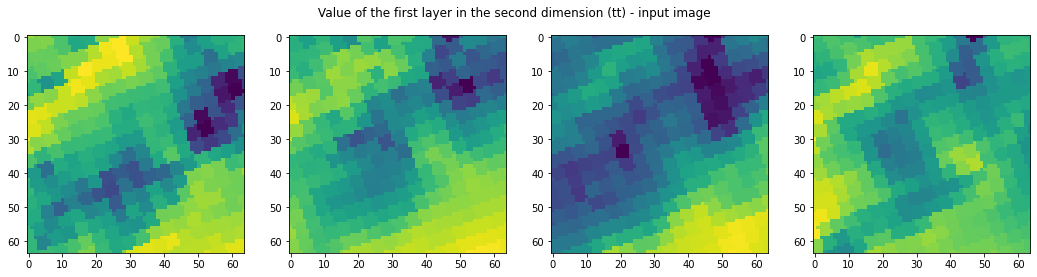

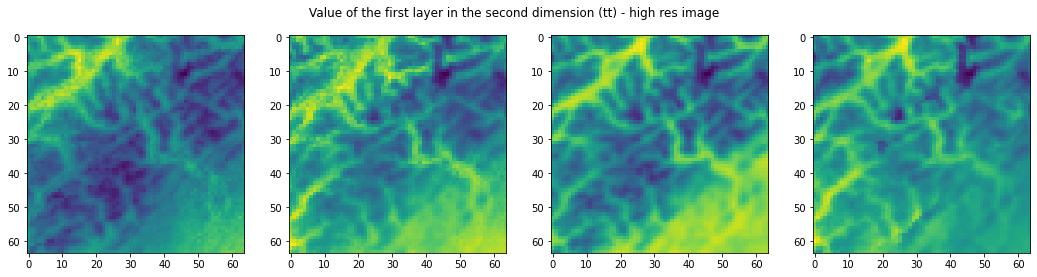

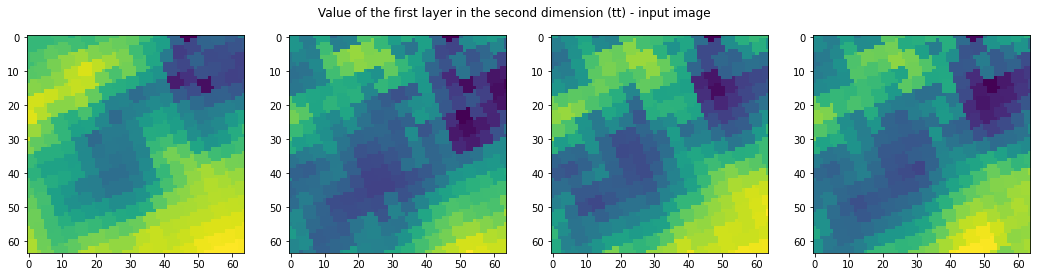

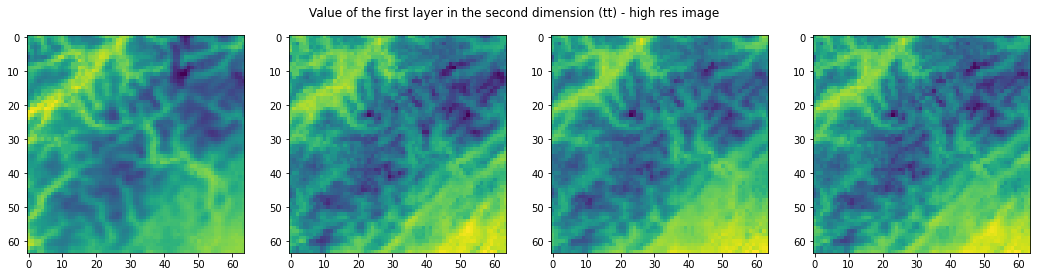

In [10]:
train_dataset= TensorDataset(cropped_x, cropped_y)
batch_size=10 # should be 32 with all the data
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
for x, y in train_loader:
  display_images(x, y, num_im=1, label=None )